# 01 - Naive Bayesian - Binary - Lab

===Task===

- Generate a 2 class data using sklearn.
- Put Gaussian Naive Binary Classification into class
- Fit the model on the data then calculate accuracy accordingly.

In [4]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, classification_report

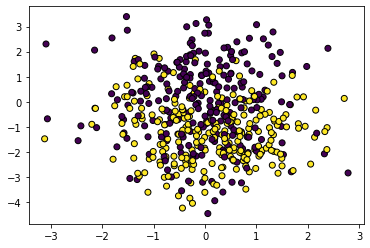

In [38]:
# Generate Data
X, y = datasets.make_classification(n_samples=500, n_features=10, n_redundant=2, n_informative=4,
                             n_clusters_per_class=2, random_state=14)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')

In [39]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [49]:
class GaussianNaiveBinaryClassification:

    def __init__(self, k=2):
        self.k = k
        self.mean = []
        self.std = []
        self.prior0 = 0
        self.prior1 = 0

    def fit(self, X, y):
        self.mean, self.std = self.mean_std(X, y)
        self.prior0 = len(y[y==0])/len(y)
        self.prior1 = len(y[y==1])/len(y)
        print(self.prior0+self.prior1)

    def gaussian_pdf(self, X, mean, std):
        first = 1 / np.sqrt(2 * np.pi * std * std)
        e = (X - mean) ** 2 / (2 * (std ** 2))
        second = np.exp(-e)
        return first * second

    def predict(self, X):
        likelihood0 = self.gaussian_pdf(X, self.mean[0, :], self.std[0, :])
        likelihood1 = self.gaussian_pdf(X, self.mean[1, :], self.std[1, :])
        prod_likelihood0 = np.prod(likelihood0, axis=1)
        prod_likelihood1 = np.prod(likelihood1, axis=1)
        posterior0 = self.prior0 * prod_likelihood0
        posterior1 = self.prior1 * prod_likelihood1
        yhat = 1 * posterior1 > posterior0
        return yhat

    def mean_std(self, X, y):
        n = X.shape[1]
        mean = np.zeros((self.k, n))
        std = np.zeros((self.k, n))
        for i in range(self.k):
            mean[i, :] = X[y==i].mean(axis=0)
            std[i, :] = X[y==i].std(axis=0)
        return mean, std

In [50]:
model = GaussianNaiveBinaryClassification()
model.fit(X_train, y_train)
ypredicted = model.predict(X_test)

1.0


In [51]:
from sklearn.metrics import average_precision_score, classification_report
print("=========Average precision score=======")
print(average_precision_score(y_test, ypredicted))
print("=========Classification report=======")
print("Report: ", classification_report(y_test, ypredicted))

=========Average precision score=======
0.8669013442697654
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.89      0.90      0.90        73
           1       0.91      0.90      0.90        77

    accuracy                           0.90       150
   macro avg       0.90      0.90      0.90       150
weighted avg       0.90      0.90      0.90       150

